# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [54]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [55]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

#### Q1. We have to test if the call back rates are different for resumes containing white sounding names versus those with black sounding names. Therefore, a Difference Between Proportions test (two proportion z-test) seems appropriate. This test will measure if the difference in observed proportions of call back rates between black and white sounding names  in the sample provided to us is statistically significant. 

For the two proportion z-test to be applicable we need
<br>
<b> 1. The sampling method for each population is simple random sampling. </b>
Since the research was conducted by randomly assigning black and white sounding names to identical resumes, we can assume that the sampling is random i.e. there is no inherent bias
<br>
<b> 2. The samples are independent </b>
Since the entries in one resume do not depend on the entries in other resume , we can assume that the samples are independent., 
<br>

<b>3. Each sample includes at least 10 successes and 10 failures. </b>
We have a total of 2435 rows for each class and there are 235 successes for class w (white sounding names) and 157 successes for class b (black sounding names). So this criteria is satisfied too. 
<br>
<b>4. Each population is at least 20 times as big as its sample. </b>
We have 2435 rows for each class and one would assume that the actual population of these classes will definitely be 20 times higher than the size of this sample. So this criteria is satisfied too. 

 For CLT to hold, the sample size should be >=30. We have more than 2000 entries for each sample class so CLT should hold. 


#### Q2. 
The null hypothesis H0 can be stated as: The proportion of call backs for white sounding names = The proportion of call backs for black sounding names

The alternate hypothesis H1 can be stated as: The proportion of call backs for white sounding names > The proportion of call backs for black sounding names

In [56]:
w = data[data.race=='w']
b = data[data.race=='b']

In [7]:
# Your solution to Q3 here

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

In [57]:
w.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
5,b,1,4,2,6,1,0,0,0,266,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
6,b,1,4,2,5,0,1,0,0,13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [58]:
sum(w.call)

235.0

In [59]:
sum(b.call)

157.0

#### Q3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches. 

Since we only care about the call back and the race columns, let us create separate these two datasets and then create pandas series containing only the call-back column so that further manipulation is easy.

First we will use the bootstrapping method. For bootstrapping, we will concatenate the two datasets and create permutation replicates of the difference in proportions. Following this we will find out what percentage of the permutation replicates have a value atleast as extreme as the observed difference of proportions 

In [60]:
w = data[data.race=='w']["call"].reset_index(drop=True)

In [61]:
b = data[data.race=='b']["call"].reset_index(drop=True)

In [62]:
b.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: call, dtype: float32

#### We will first visualize the two segments of the data by plotting their respective ecdfs . First we will define the ecdf function

In [63]:
# Define ecdf function
def ecdf(data):
    """" Compute the ECDF for a one-dimensional array of measurements """
    
    # Number of data points: n
    n=len(data)
    
    # x: sort data
    x=np.sort(data)
    
    #y
    y=np.arange(1,n+1)/n
    
    return x,y
    

In [64]:
# Calculate some basic statistics for the two datasets present in the data

# white sounding names
w_call_back=np.sum(w)
w_total=len(w)
w_call_back_ratio= w_call_back/w_total

# black sounding names
b_call_back = np.sum(b)
b_total = len(b)
b_call_back_ratio = b_call_back/b_total 

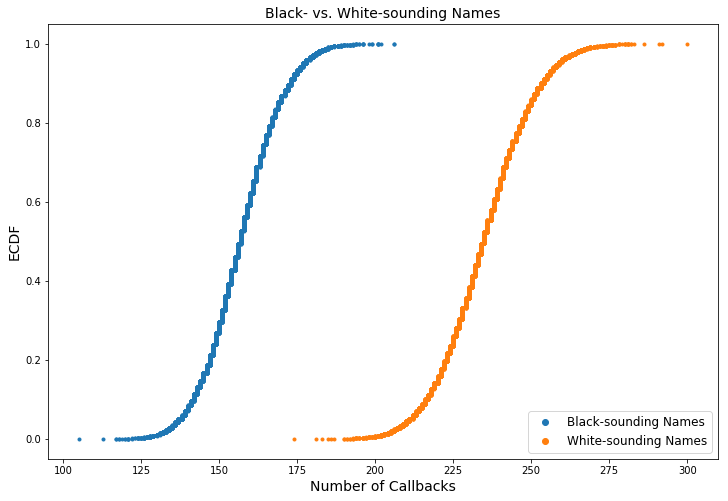

In [65]:
# Generate 10000 replicates of the number of successful call backs for both white and black resumes given the success rates. 


w_samples = np.random.binomial(w_total, w_call_back_ratio, size=10000)
b_samples = np.random.binomial(b_total, b_call_back_ratio, size=10000)

plt.figure(figsize=(12,8))

bx, by = ecdf(b_samples)
_ = plt.plot(bx, by, marker='.', linestyle='none')

wx, wy = ecdf(w_samples)
_ = plt.plot(wx, wy, marker='.', linestyle='none')

plt.margins = 0.02

_ = plt.xlabel('Number of Callbacks',fontsize=14)
_ = plt.ylabel('ECDF',fontsize=14)
_ = plt.title('Black- vs. White-sounding Names',fontsize=14)
_ = plt.legend(('Black-sounding Names', 'White-sounding Names'), loc='lower right', fontsize='large', markerscale=2)

From the above EDA, we can see that the distribution of call-backs appear quite different and at least visually it appears that there should be a statistically significant difference in the call-back ratios between the two subsets. 

In [66]:
## Definining functions necessary for our bootstrap method 

# Function which accepts two datasets and generates random permutations 
def permutation_sample(data_1,data_2):
    data=np.concatenate((data_1,data_2))
    permuted_data=np.random.permutation(data)
    perm_sample_1=permuted_data[:len(data_1)]
    perm_sample_2=permuted_data[len(data_2):]
    return perm_sample_1, perm_sample_2

# Function to accept two datasets and calculate the desired number of permutation replicates (func is the statistic that the permutation
# replicate calculates and the number of replicates is specified by size.)
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

# Function to calculate the difference in proportions 
def diff_of_props(data_1,data_2):
    diff_of_props=(np.sum(data_1)/len(data_1))- (np.sum(data_2)/len(data_2))
    return diff_of_props

In [67]:
# Calculate the observed difference in proportions
emp_diff_props=diff_of_props(w,b)

In [68]:
# The observed difference in call-back ratios among white and black candidates 
emp_diff_props

0.032032854209445585

In [69]:
# Generating 100000 permutation replicates of the difference of means assuming that the null hypothesis is true i.e there is
# no difference in call-back ratio among black and white candidate resumes
perm_replicates=draw_perm_reps(w,b,diff_of_props,100000)

In [70]:
# Compute p-value. Lets have a significance level of 0.05
p_value=np.sum(perm_replicates>=emp_diff_props)/len(perm_replicates)

In [71]:
p_value

1e-05

Such a low p-value indicates that very few of our replicates were equal to or more than the proportion difference of 0.032 which was observed in the true dataset. This means that we have to reject the null hypothesis and there is a statistically significant difference in the call back rates between the two datasets. 

In [72]:
# Calculate the confidence interval
diff_prop_ci=np.percentile(perm_replicates,[2.5,97.5])

In [73]:
diff_prop_ci

array([-0.01560575,  0.01560575])

The above confidence interval means that if we do our experiment many times, then 95% of the values of the difference of proportions are going to lie between -0.0156 and 0.0156. This means that our observed difference of ~ 0.0320328 is outside this confidence interval. It should be noted that this confidence interval has been calculated under the assumption that the null hypothesis is true. 

We can also try computing the confidence interval of the difference of the means based on the samples that we have been provided. I will not assume that the null hypothesis is true. Instead, I will simulate experiments where I will randomly sample from the black and white datasets and try to calculate difference of proportions replicates. 

In [74]:
def draw_ran_samples(data1,data2,func,size=1):
    
    perm_replicate=np.empty(size)
    
    size_data_w=len(w)
    size_data_b=len(b)
    
    
    for i in range(size):
        w_random=np.random.choice(w,size_data_w)
        b_random=np.random.choice(b,size_data_b)
        perm_replicate[i]=func(w_random,b_random)
    
    return perm_replicate

diff_prop_replicate=draw_ran_samples(w,b,diff_of_props,10000)

        

In [75]:
# Calculate the confidence interval
diff_prop_ci_alt=np.percentile(diff_prop_replicate,[2.5,97.5])

In [76]:
diff_prop_ci_alt

array([0.01683778, 0.04682752])

This shows that if we randomly sample from the black and white parts of the data, then the confidence interval of the resulting difference of proportions is 0.01683778, 0.04722793. 

In [77]:
moe_1st_method = (diff_prop_ci[1]-diff_prop_ci[0])/2
moe_2nd_method = (diff_prop_ci_alt[1]-diff_prop_ci_alt[0])/2

In [78]:
moe_1st_method

0.015605749486652984

In [79]:
moe_2nd_method

0.01499486652977405

Mean error seems close in both cases. 

## Use Frequentist approach to calculate the p-value, confidence interval and mean error

In [88]:
def ztest_proportions_two_samples(r1, n1, r2, n2, one_sided=False):
    """Returns the z-statistic and p-value for a 2-sample Z-test of proportions"""
    p1 = r1/n1
    p2 = r2/n2
    
    #By calculating the average p, we are essential assuming the null hypothesis that there is no difference
    # in call back rates . Then having a distribution with this average call back rate as mean, we will calculate the probabolity
    # of finding a difference in proportions from two samples which is atleast as extreme as the one observed
    p = (r1+r2)/(n1+n2)
    se = np.sqrt(p*(1-p)*(1/n1+1/n2))
    
    z = (p1-p2)/se
    p_value = 1-stats.norm.cdf(abs(z))
    p_value *= 2-one_sided
    return z, p_value

In [89]:
# 95% confidence interval
prop_diff = w_call_back_ratio - b_call_back_ratio
print('Observed difference in proportions: \t {}\n'.format(prop_diff))

z_crit = 1.96
p_hat1 = w_call_back_ratio*(1-w_call_back_ratio)/w_total
p_hat2 =  b_call_back_ratio*(1-b_call_back_ratio)/b_total
ci_high = prop_diff + z_crit*(np.sqrt(p_hat1 + p_hat2))
ci_low = prop_diff - z_crit*(np.sqrt(p_hat1 + p_hat2))

z_stat, p_val = ztest_proportions_two_samples(w_call_back, w_total, b_call_back, b_total)
print('z-stat: \t {}\np-value: \t {}'.format(z_stat, p_val))

print('95% conf int: \t {} - {}'.format(ci_low, ci_high))
moe = (ci_high - ci_low)/2
print('Margin of err: \t +/-{}'.format(moe))


Observed difference in proportions: 	 0.032032854209445585

z-stat: 	 4.108412152434346
p-value: 	 3.983886837577444e-05
95% conf int: 	 0.016777447859559147 - 0.047288260559332024
Margin of err: 	 +/-0.015255406349886438


The p-value corresponds to the probability of finding a difference in proportions atleast as extreme as seen in our dataset assuming that assuming the null hypothesis is true. One can see from the frequentist approach that this probability is quite low and we can reject the null hypothesis if we start with even a very low significance value. The confidence interval on the other hand corresponds to the range of values for the difference in means that we may get if we repeat this experiment many many times . We can see that this confidence interval matches the one we got from our bootstrap approach reasonably. 

### Q4. Write a story describing the statistical significance in the context or the original problem.

Having conducted statistical tests about the difference of proportions of call backs received for black and white sounding resumes, we can see that the call back rates differ from each other significantly. An initial EDA gave us some flavor of the difference in call back rates. A more rigorous statistical analysis from both frequentist and bootstrap approaches led us to conclude that the null hypothesis that there is no difference between the call back rates of black and white sounding resumes can be rejected and there seems to be evidence of bias towards black sounding names when it comes to call back rates. 

### Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

While there does seem to be a correlation between race/name and call back success, correlation does not always imply causation. The initial description of the study does say that identical resumes were assigned black and white sounding names so it does seem like all other factors remaning the same, changing the race/name does affect the call back rate. Some other factors such as were the resumes sent out at the same time and to same kind of jobs etc. can be examined to rule out any other contributing factor.  